<a href="https://colab.research.google.com/github/Azimoj/CNN/blob/main/Copy_of_W10_CNN_with_TensorFlow_and_Keras_%5BCorrection%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification with CNN
In this quest, you will work with the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).
It contains 60000 32x32 colour images in 10 classes, with 6000 images per class. It can be accessed using the load_data() function.
Train a CNN on this dataset for image classification.


# Preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading CIFAR train and test datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Tasks

Normalize pixel values of both train and test images to the values in the range between 0 and 1

In [ ]:
test_images[4].shape

(32, 32, 3)

In [ ]:
print(test_labels[4].shape)
print(test_labels[4])

(1,)
[6]


In [ ]:
class_names[test_labels[4][0]]

'frog'

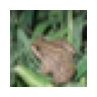

In [ ]:
plt.figure(figsize=(1, 1))
plt.imshow(test_images[4])
plt.axis('off')
plt.show()

In [ ]:
print(test_images.min())
print(test_images.max())

0
255


In [ ]:
test_images_normalize = test_images / 255
print(test_images_normalize.min())
print(test_images_normalize.max())

train_images_normalize = train_images / 255
print(train_images_normalize.min())
print(train_images_normalize.max())

0.0
1.0
0.0
1.0


Build a sequential model with the following architecture:

conv2d - (None, 30, 30, 32)  
_________________________________________________________________
max_pooling2d - (None, 15, 15, 32)        
_________________________________________________________________
conv2d - (None, 13, 13, 64)
_________________________________________________________________
max_pooling2d - (None, 6, 6, 64)        
_________________________________________________________________
conv2d - (None, 4, 4, 128)
_________________________________________________________________
flatten - (None, 2048)       
_________________________________________________________________
dense - (None, 64)    
_________________________________________________________________
dense - (None, 10)       


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

- **Classification binaire** : 1 neurone, fonction d'activation **sigmoïde**
- **Classification multi-class** : n neurones correspondant à n classes, fonction d'activation **softmax**
- **Classification multi-label** : n neurones correspondant à n classes, fonction d'activation **sigmoïde**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

Compile the model using Adam optimizer, sparse categorical crossentropy as loss function, and choose an appropriate metric for classification. Use 10 epochs to train the model.

- **binary_crossentropy** label de la forme : 0 / 1

- **sparse_categorical_crossentropy** label de la forme : 6 / 4 / 9
 -> Entiers

- **categorical_crossentropy** label de la forme : [0, 1, 0, 0]
 -> OneHot

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images_normalize, train_labels, batch_size=128, epochs=10, validation_data=(test_images_normalize, test_labels))

Epoch 1/10
391/391 [==============================] - 10s 13ms/step - loss: 1.6615 - accuracy: 0.3917 - val_loss: 1.3822 - val_accuracy: 0.5025
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.2871 - accuracy: 0.5399 - val_loss: 1.2029 - val_accuracy: 0.5727
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1254 - accuracy: 0.6010 - val_loss: 1.0832 - val_accuracy: 0.6119
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0262 - accuracy: 0.6397 - val_loss: 0.9941 - val_accuracy: 0.6501
Epoch 5/10
391/391 [==============================] - 4s 9ms/step - loss: 0.9449 - accuracy: 0.6713 - val_loss: 0.9608 - val_accuracy: 0.6576
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 0.8737 - accuracy: 0.6962 - val_loss: 0.9089 - val_accuracy: 0.6845
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.8177 - accuracy: 0.7167 - val_loss: 0.8971 - val_accuracy: 0.6904
Epoc

Evaluate the model on test data to get the loss and accuracy metrics

In [ ]:
# Plotting the model performance during the training phase
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))

    # Plot ting the accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = 'acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label = 'val_acc')
    plt.title('train_acc VS val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()

    # Plotting loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title('train_loss VS val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')

    plt.legend()

    plt.show()

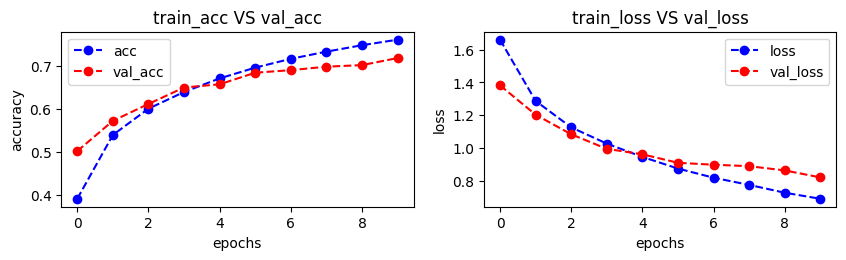

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images_normalize, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.8197 - accuracy: 0.7185


In [ ]:
from sklearn.metrics import classification_report
# Vector of probabilities
predictions = model.predict(test_images_normalize)
pred_labels = np.array([np.argmax(x) for x in predictions]).reshape(-1, 1)

print(classification_report(test_labels, pred_labels))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.79      0.75      1000
           1       0.81      0.84      0.83      1000
           2       0.62      0.61      0.61      1000
           3       0.63      0.44      0.52      1000
           4       0.58      0.77      0.66      1000
           5       0.61      0.66      0.63      1000
           6       0.80      0.77      0.78      1000
           7       0.80      0.73      0.76      1000
           8       0.88      0.78      0.83      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



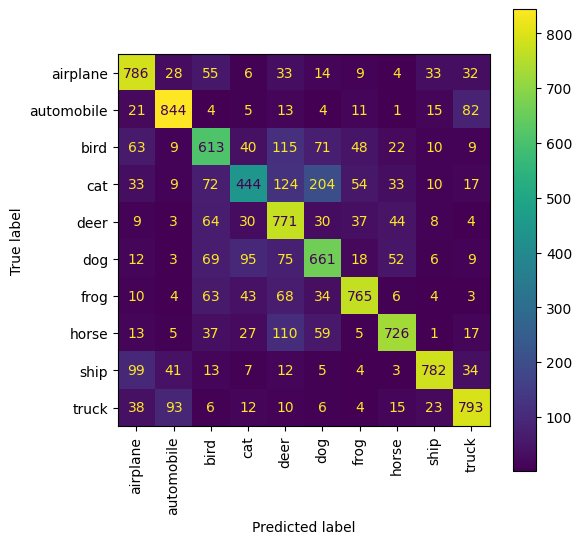

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(test_labels, pred_labels, display_labels=class_names, ax=ax, xticks_rotation="vertical")
plt.show()

### Tentative avec entrainement + long

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images_normalize, train_labels, batch_size=128, epochs=50, validation_data=(test_images_normalize, test_labels))

Epoch 1/50
391/391 [==============================] - 7s 11ms/step - loss: 1.6390 - accuracy: 0.4005 - val_loss: 1.3903 - val_accuracy: 0.5003
Epoch 2/50
391/391 [==============================] - 3s 6ms/step - loss: 1.2735 - accuracy: 0.5454 - val_loss: 1.2120 - val_accuracy: 0.5724
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.1128 - accuracy: 0.6092 - val_loss: 1.0958 - val_accuracy: 0.6174
Epoch 4/50
391/391 [==============================] - 3s 6ms/step - loss: 1.0049 - accuracy: 0.6488 - val_loss: 0.9841 - val_accuracy: 0.6593
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 0.9156 - accuracy: 0.6819 - val_loss: 0.9136 - val_accuracy: 0.6862
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.8477 - accuracy: 0.7055 - val_loss: 0.9496 - val_accuracy: 0.6747
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.7843 - accuracy: 0.7284 - val_loss: 0.9195 - val_accuracy: 0.6908
Epoch

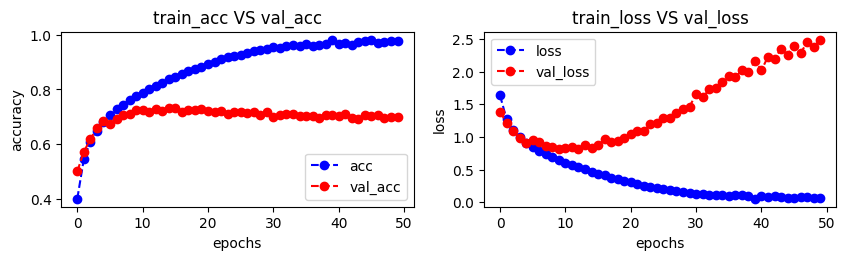

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.83      0.80      0.82      1000
           2       0.65      0.53      0.58      1000
           3       0.50      0.53      0.52      1000
           4       0.63      0.67      0.65      1000
           5       0.63      0.53      0.58      1000
           6       0.79      0.77      0.78      1000
           7       0.72      0.75      0.74      1000
           8       0.77      0.84      0.80      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
plot_accuracy_loss(history)

test_loss = model.evaluate(test_images_normalize, test_labels)
predictions = model.predict(test_images_normalize)
pred_labels = np.array([np.argmax(x) for x in predictions]).reshape(-1, 1)

print(classification_report(test_labels, pred_labels))

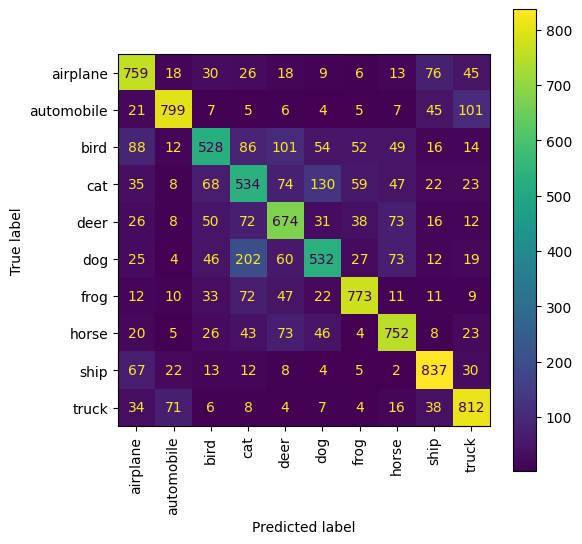

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(test_labels, pred_labels, display_labels=class_names, ax=ax, xticks_rotation="vertical")
plt.show()

### Rajout de batch normalization / dropout et sélection du meilleur modèle

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images_normalize, train_labels,
                    batch_size=256,
                    epochs=50,
                    validation_data=(test_images_normalize, test_labels),
                    callbacks=[model_checkpoint])

Epoch 1/50
196/196 [==============================] - ETA: 0s - loss: 1.8354 - accuracy: 0.3766
Epoch 1: val_accuracy improved from -inf to 0.21170, saving model to best_model.h5
196/196 [==============================] - 8s 14ms/step - loss: 1.8354 - accuracy: 0.3766 - val_loss: 2.4598 - val_accuracy: 0.2117
Epoch 2/50
 16/196 [=>............................] - ETA: 1s - loss: 1.4639 - accuracy: 0.4851

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


195/196 [============================>.] - ETA: 0s - loss: 1.3750 - accuracy: 0.5166
Epoch 2: val_accuracy improved from 0.21170 to 0.41060, saving model to best_model.h5
196/196 [==============================] - 2s 8ms/step - loss: 1.3749 - accuracy: 0.5166 - val_loss: 1.6602 - val_accuracy: 0.4106
Epoch 3/50
193/196 [============================>.] - ETA: 0s - loss: 1.2269 - accuracy: 0.5695
Epoch 3: val_accuracy improved from 0.41060 to 0.57220, saving model to best_model.h5
196/196 [==============================] - 2s 8ms/step - loss: 1.2270 - accuracy: 0.5696 - val_loss: 1.1902 - val_accuracy: 0.5722
Epoch 4/50
192/196 [============================>.] - ETA: 0s - loss: 1.1303 - accuracy: 0.6042
Epoch 4: val_accuracy improved from 0.57220 to 0.62710, saving model to best_model.h5
196/196 [==============================] - 2s 8ms/step - loss: 1.1299 - accuracy: 0.6042 - val_loss: 1.0405 - val_accuracy: 0.6271
Epoch 5/50
192/196 [============================>.] - ETA: 0s - loss: 1.

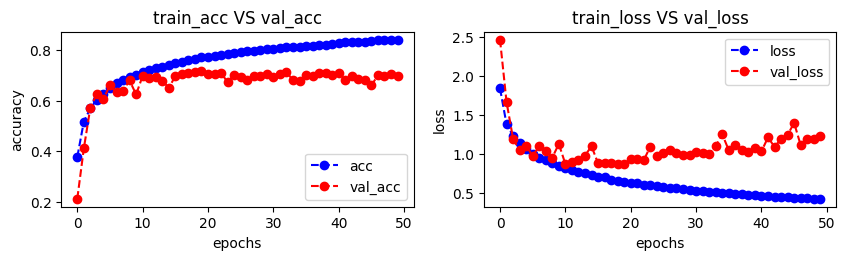

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1000
           1       0.81      0.80      0.80      1000
           2       0.63      0.52      0.57      1000
           3       0.55      0.47      0.51      1000
           4       0.64      0.72      0.67      1000
           5       0.62      0.57      0.59      1000
           6       0.79      0.76      0.78      1000
           7       0.77      0.73      0.75      1000
           8       0.81      0.78      0.80      1000
           9       0.61      0.90      0.73      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [ ]:
plot_accuracy_loss(history)

test_loss = model.evaluate(test_images_normalize, test_labels)
predictions = model.predict(test_images_normalize)
pred_labels = np.array([np.argmax(x) for x in predictions]).reshape(-1, 1)

print(classification_report(test_labels, pred_labels))

In [ ]:
best_model = tf.keras.models.load_model("best_model.h5")

In [ ]:
test_loss = best_model.evaluate(test_images_normalize, test_labels)
predictions = best_model.predict(test_images_normalize)
pred_labels = np.array([np.argmax(x) for x in predictions]).reshape(-1, 1)

print(classification_report(test_labels, pred_labels))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.85      0.82      0.84      1000
           2       0.65      0.55      0.59      1000
           3       0.52      0.58      0.55      1000
           4       0.63      0.71      0.67      1000
           5       0.62      0.59      0.60      1000
           6       0.76      0.80      0.78      1000
           7       0.76      0.77      0.76      1000
           8       0.84      0.81      0.83      1000
           9       0.80      0.82      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



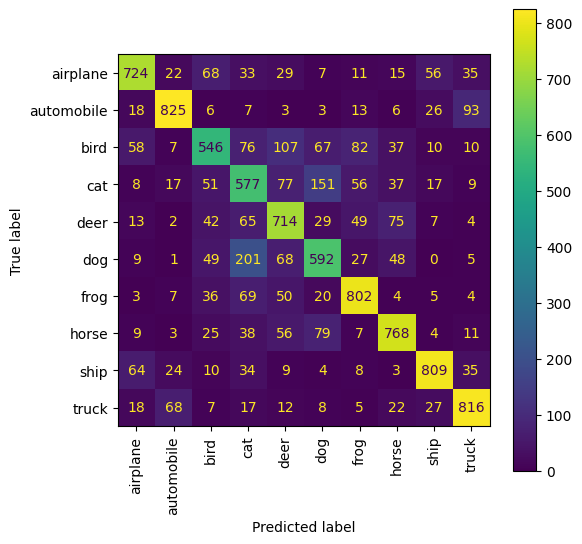

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(test_labels, pred_labels, display_labels=class_names, ax=ax, xticks_rotation="vertical")
plt.show()